# Conjunto de dados para classificação da qualidade de vinho

## Definição do Problema

O dataset Pima Indians Diabetes involve a predição de diabetes precoce dentro de 5 anos em Indios Pimas dado detalhes médicos.

É um problema de classificação binário (2-classes). O número de observações para cada classe não é balanceado. Existem 768 observações com 8 variáveis de entrada and 1 variável de saída. Valores que estão faltando são codificados como 0. O nome das variáveis são as seguintes:

1. Numero de vezes que paciente ficou gravida.
2. Concentração plasmática de glicose das ultimas 2 horas em um teste oral de tolerância à glicose.
3. Pressão sanguínea diastólica (mm Hg).
4. Espessura da dobra cutânea tricipital (mm).
5. Insulina sérica das ultimas 2 horas (mu U/ml).
6. IMC (weight in kg/(height in m)^2).
7. Função de pedigree de diabetes.
8. Idade (years).
9. Variavel de classe (0 or 1).


### Importação das bibliotecas

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import model_selection 

### Carregando e definindo as colunas do dataset

In [15]:
columns = ["n gravidez","con plasma","press sang",
           "esp dobra","insulina","IMC",
           "pedigree","idade", "classe"]
data = pd.read_csv('pimas.csv',names=columns)

### Visualização e descrição dos dados

In [16]:
data.head(10)

,n gravidez,con plasma,press sang,esp dobra,insulina,IMC,pedigree,idade,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
data.describe()

,n gravidez,con plasma,press sang,esp dobra,insulina,IMC,pedigree,idade,classe
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
print(data.shape)

(768, 9)


In [19]:
print(data.groupby('classe').size())

classe
0    500
1    268
dtype: int64


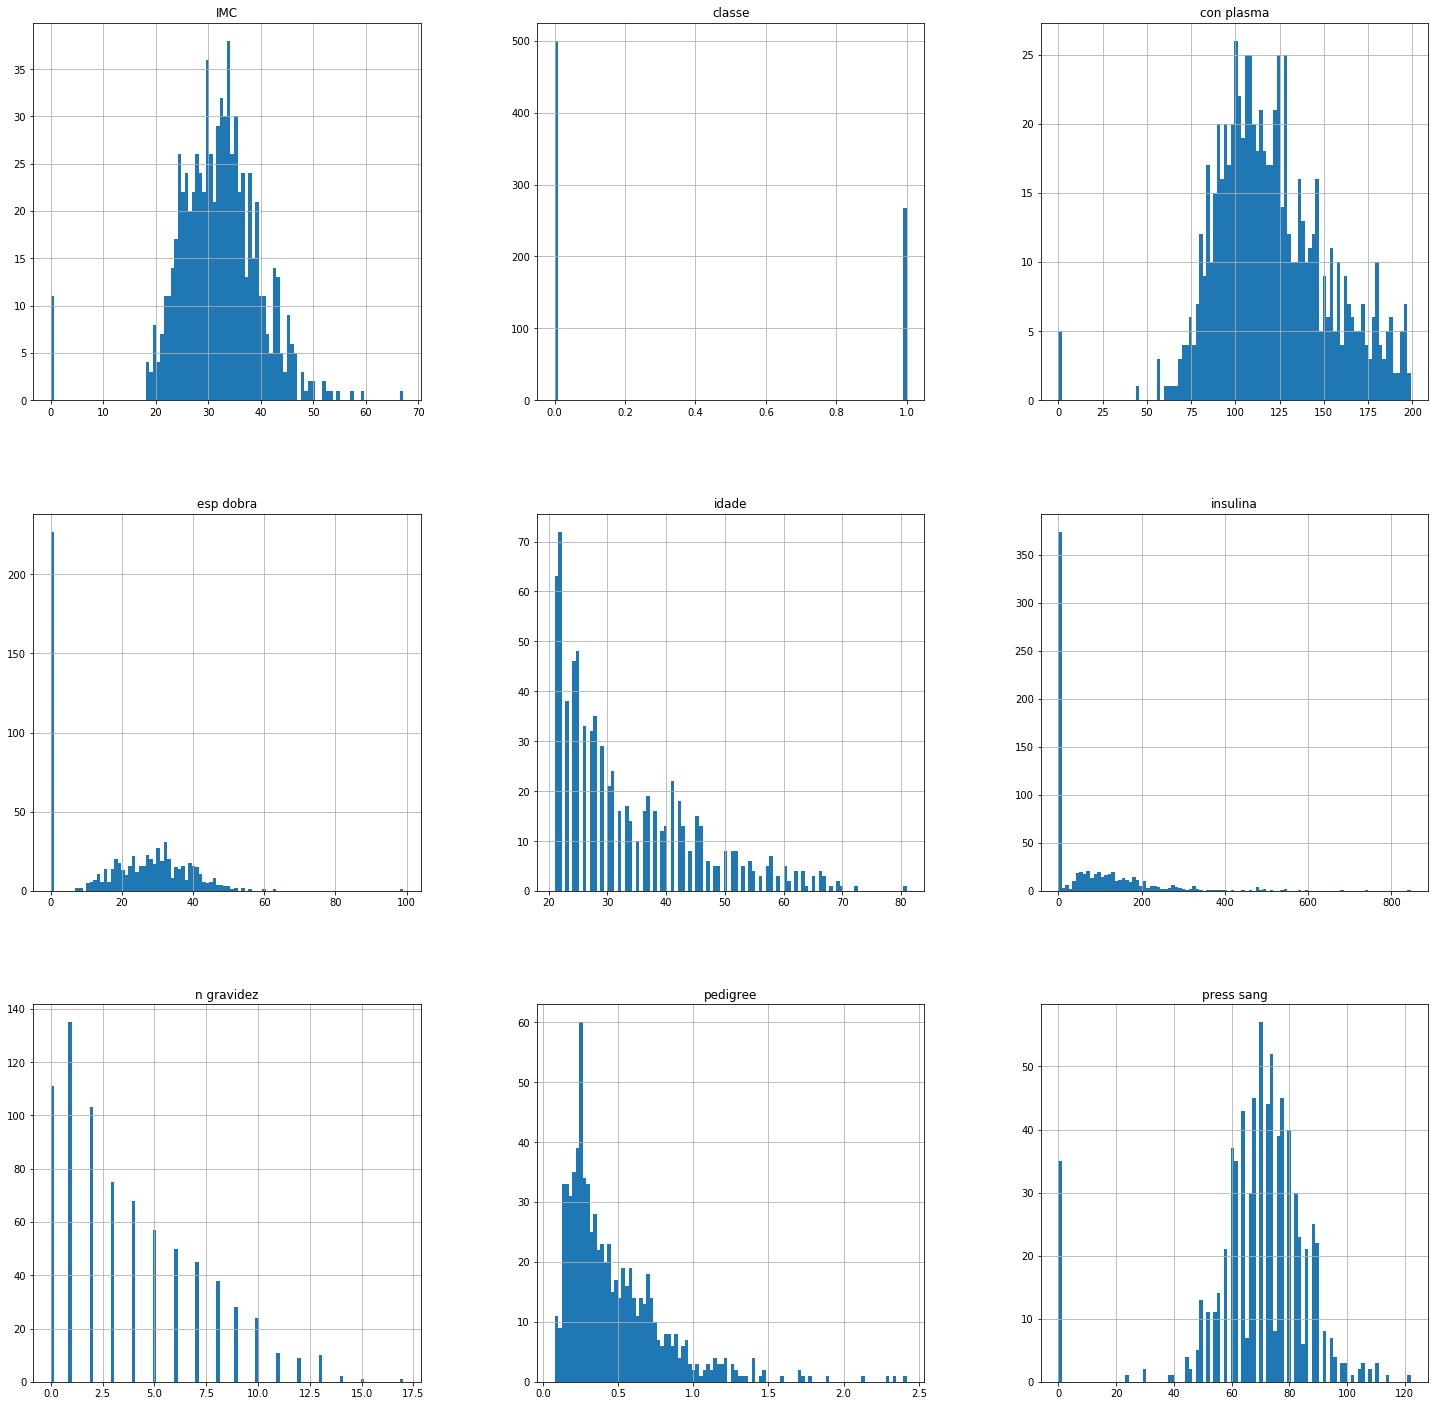

In [20]:
data.hist(figsize=(25,25), bins=100);

In [21]:
data.corr()

,n gravidez,con plasma,press sang,esp dobra,insulina,IMC,pedigree,idade,classe
n gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
con plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
press sang,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
esp dobra,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
classe,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Criação do dataset de validação 

In [22]:
dataset = data.values
print(dataset)

[[   6.     148.      72.    ...,    0.627   50.       1.   ]
 [   1.      85.      66.    ...,    0.351   31.       0.   ]
 [   8.     183.      64.    ...,    0.672   32.       1.   ]
 ..., 
 [   5.     121.      72.    ...,    0.245   30.       0.   ]
 [   1.     126.      60.    ...,    0.349   47.       1.   ]
 [   1.      93.      70.    ...,    0.315   23.       0.   ]]


In [23]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[   7.   ,  136.   ,   74.   , ...,    0.647,   51.   ,    0.   ],
       [   1.   ,  151.   ,   60.   , ...,    0.179,   22.   ,    0.   ],
       [   6.   ,  109.   ,   60.   , ...,    0.206,   27.   ,    0.   ],
       ..., 
       [  13.   ,  126.   ,   90.   , ...,    0.583,   42.   ,    1.   ],
       [   4.   ,  171.   ,   72.   , ...,    0.479,   26.   ,    1.   ],
       [   9.   ,  102.   ,   76.   , ...,    0.665,   46.   ,    1.   ]])

In [24]:
X = dataset[:,:8]
y = dataset[:,8]

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((768, 8), (768,), (514, 8), (514,), (254, 8), (254,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [31]:
resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression() }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier() }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['accuracy'] = metrics.accuracy_score(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [33]:
df = pd.DataFrame(resultados)
df.T[['accuracy','y_pred']]

,accuracy,y_pred
DTC,0.653543,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
GB,0.704724,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
KNN,0.720472,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
LOR,0.73622,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
NB,0.724409,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
RF,0.69685,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
SGD,0.53937,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
SVC,0.625984,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [34]:
df_T = df.transpose()
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.653543
GB,0.704724
KNN,0.720472
LOR,0.73622
NB,0.724409
RF,0.69685
SGD,0.53937
SVC,0.625984


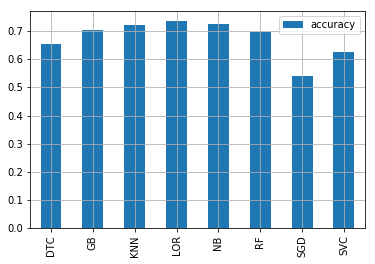

In [35]:
df_T.plot(kind='bar', grid=True);

In [37]:
modelo_final = linear_model.LogisticRegression()
modelo_final.fit(X,y);